# Load the dataset


In [12]:
import pandas as pd

df = pd.read_csv("data/temp_data.csv")
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


# Preprocess the data

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
temp = scaler.fit_transform(df[['Temp']])

In [14]:
import numpy as np

seq_length = 3

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(temp, seq_length)

# Split the dataset into training and testing sets

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape the X_train, X_test
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2917, 3, 1)
y_train shape: (2917, 1)
X_test shape: (730, 3, 1)
y_test shape: (730, 1)


# Create the neural network model using vanilla

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(SimpleRNN(8))
model.add(Dense(1))

# Specify the optimizer
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Early stopping

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

In [18]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, callbacks=[early_stopping]).history

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0087 - val_loss: 0.0397
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 0.0478 - val_loss: 0.0303
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 0.0375 - val_loss: 0.0237
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.0270 - val_loss: 0.0198
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0225 - val_loss: 0.0176
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.0191 - val_loss: 0.0158
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0164 - val_loss: 0.0146
Epoch 8/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.0146 - val_loss: 0.0135
Epoch 9/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.0136 - val_loss: 0.0127
Epoch 10/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.0132 - val_loss: 0.0117
Epoch 11/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.0117 - val_loss: 0.0111
Epoch 12/100
165/165 ━━━━

# Evaluate the model

In [19]:
loss = model.evaluate(X_test, y_test)

print(f"Test loss: {loss:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.0074
Test loss: 0.0078


# Plot the training & validation loss

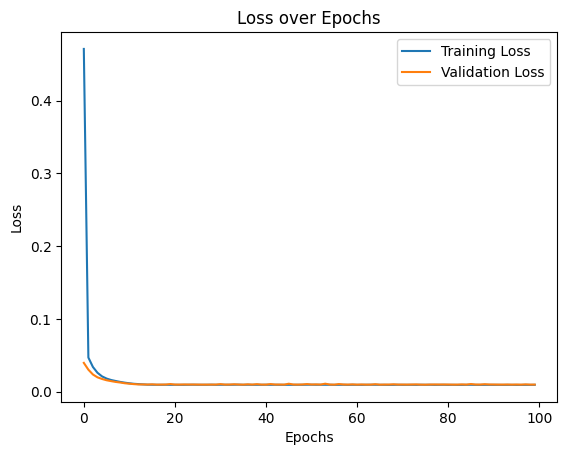

In [20]:
import matplotlib.pyplot as plt

plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()